<a href="https://colab.research.google.com/github/najwaazka16/pembelajaran-mesin-NajwaAzka-2211533012/blob/main/tugas_praktikum_logistic_regression_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv('Employee.csv')
X = dataset.iloc[:, [1, 4]].values
y = dataset.iloc[:, -1].values

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[2016   24]
 [2014   29]
 [2017   37]
 ...
 [2017   26]
 [2018   27]
 [2012   28]]
[1 0 0 ... 0 1 0]
[[2014   25]
 [2015   28]
 [2016   25]
 ...
 [2015   26]
 [2015   28]
 [2017   26]]
[1 1 0 ... 0 0 0]


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.49404111 -1.11343584]
 [-0.5759213  -0.08195115]
 [ 1.02902231  1.56842436]
 ...
 [ 1.02902231 -0.70084196]
 [ 1.56400352 -0.49454503]
 [-1.6458837  -0.28824809]]
[[-0.5759213  -0.9071389 ]
 [-0.04094009 -0.28824809]
 [ 0.49404111 -0.9071389 ]
 ...
 [-0.04094009 -0.70084196]
 [-0.04094009 -0.28824809]
 [ 1.02902231 -0.70084196]]


In [14]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[771   0]
 [352  41]]


0.697594501718213

<ipython-input-22-06ca1c027e6e>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)


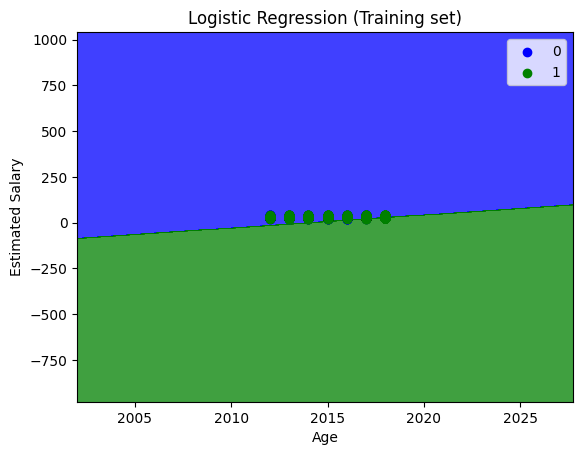

In [22]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()